Logistic Regression - Analysis
==============================
***

### Introduction

We're going to look at the same data set from Lending Club but ask a different question.  One that has a binary outcome.  

Let's assume we have a FICO Score of 720 and we want to borrow 10,000 dollars.
We would like to get an Interest Rate less that 12 per cent.

The question we pose is: 

##### _Can we get a loan, from the Lending Club, of 10,000 dollars at 12 per cent or less, with a FICO Score of 720?_

### Methods

How do we use Logistic Regression here?  Let's recast the problem as follows:-

##### _What is the probability of getting a Loan, from the Lending Club, of 10,000 dollars at 12 per cent or less with a FICO Score of 720?_  

Then let us decide that if we get a probability of less than 0.67 we say it means we won't get the loan and if it is greater than 0.67 we will. I.e. we are not confident until we have a 2/3 chance of getting it.

In reality we can set the threshold higher, say 0.8, if we want to be "more certain" that it will happen, but for this exercise we'll just say 0.67.


From initial discussion we say we want to start with a model of the form

$Interest Rate = a_0 + a_1*FICOScore + a_2*LoanAmount$

And the derive a second equation of the form:

Z = Prob (InterestRate less than 12 percent).

We apply this to the existing dataset and create a Logistic Regression Model using modeling software.

### Results

As with the Linear Regression Model, we use the cleaned up Lending Club data set as input.

In [1]:
%pylab inline
import pandas as pd
dfr = pd.read_csv('../datasets/loanf.csv')
# inspect, sanity check
dfr.head()

Populating the interactive namespace from numpy and matplotlib


,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [2]:
# we add a column which indicates (True/False) whether the interest rate is <= 12 
dfr['TF']=dfr['Interest.Rate']<=12
# inspect again
dfr.head()
# we see that the TF values are False as Interest.Rate is higher than 12 in all these cases

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [3]:
# now we check the rows that have interest rate == 10 (just some number < 12)
# this is just to confirm that the TF value is True where we expect it to be
d = dfr[dfr['Interest.Rate']==10]
d.head()
# all is well

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
650,10.0,700,36,3250.00,2800,True
204,10.0,715,36,15416.67,6000,True
440,10.0,730,36,6250.00,21000,True
521,10.0,715,36,5000.00,12000,True
1017,10.0,735,60,4000.00,5000,True


Now we use our Logistic Regression modeler software to create Logit model using this data, with the 'TF' column as the dependent (or response) variable and 'FICO.Score' and 'Loan.Amount' as independent (or predictor) variables.


In [4]:
import statsmodels.api as sm
# statsmodels requires us to add a constant column representing the intercept
dfr['intercept']=1.0
# identify the independent variables 
ind_cols=['FICO.Score','Loan.Amount','intercept']
logit = sm.Logit(dfr['TF'], dfr[ind_cols])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8


We should see some soothing messages from our software re-assuring us that all went well 
and giving us some numbers we may not find useful right now.  
More importantly we want the results.
What are the fitted coefficients that the software has computed?

In [5]:
# get the fitted coefficients from the results
coeff = result.params
print coeff

FICO.Score      0.087423
Loan.Amount    -0.000174
intercept     -60.125045
dtype: float64


The numbers above are the coefficients for the respective independent, i.e. predictor, variables in the linear expression we saw in the Overview.  Except, we now have two instead of one predictor.  We have multivariate linear regression.

So, using the above coefficients, the linear part of our predictor is  

$$z = -60.125 + 0.087423*FicoScore -0.000174*LoanAmount$$

Finally, the probability of our desired outcome, ie our getting a loan at 12% interest or less, is

$$p(z) = \frac{1}{1 + e^{b_0 + b_1*FicoScore + b_2*LoanAmount}}$$  

where  $b_0 = −60.125, b_1 = 0.087423$ and $b_2 = −0.000174$

We create a function in code that encapsulates all this.

It takes as input, a borrowers FICO score, the desired loan amount and the coefficient vector from our model. It returns a probability of getting the loan, a number between 0 and 1.

In [6]:
def pz(fico,amt,coeff):
  # compute the linear expression by multipyling the inputs by their respective coefficients.
  # note that the coefficient array has the intercept coefficient at the end
  z = coeff[0]*fico + coeff[1]*amt + coeff[2]
  return 1/(1+exp(-1*z))

Now we use our data FICO=720 and Loan Amount=10,000 to get a probability using the z value
and the logistic formula. 

In [7]:
pz(720,10000,coeff)

0.74637858895151077

This value of 0.746 tells us we have a good chance of getting the loan we want, according to our criterion, where anything above 0.67 was considered a 'yes'.

Now we are going to try (fico, amt) pairs as follows:

* 720,20000
* 720,30000
* 820,10000
* 820,20000 
* 820,30000 

In [8]:
print("Trying multiple FICO Loan Amount combinations: ")
print('----')
print("fico=720, amt=10,000")
print(pz(720,10000,coeff))
print("fico=720, amt=20,000")
print(pz(720,20000,coeff))
print("fico=720, amt=30,000")
print(pz(720,30000,coeff))
print("fico=820, amt=10,000")
print(pz(820,10000,coeff))
print("fico=820, amt=20,000")
print(pz(820,20000,coeff))
print("fico=820, amt=30,000")
print(pz(820,30000,coeff))


Trying multiple FICO Loan Amount combinations: 
----
fico=720, amt=10,000
0.746378588952
fico=720, amt=20,000
0.340539857688
fico=720, amt=30,000
0.083083595237
fico=820, amt=10,000
0.999945742327
fico=820, amt=20,000
0.999690867752
fico=820, amt=30,000
0.998240830138


We see as somewhat expected that the person with a 720 FICO Score will have decreasing probability of getting loans with higher amounts.
However, the person with the 820 FICO Score is very likely to get loans with those amounts, again as expected.

In [9]:
pz(820,63000,coeff)

0.64525116319288345

Lets try with Scikit-learn library

In [10]:
ind_cols=['FICO.Score','Loan.Amount']
X = dfr[ind_cols].values
print type(X)
print X.shape

<type 'numpy.ndarray'>
(2500, 2)


In [11]:
y = dfr['TF'].values
print type(y)
print y.shape

<type 'numpy.ndarray'>
(2500,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(2000, 2)
(2000,)
(500, 2)
(500,)


In [18]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=100)
logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.654


In [21]:
print logreg.coef_
print logreg.intercept_

[[  7.34877699e-04  -7.24828027e-05]]
[  2.70415964e-08]


In [ ]:
x1 = array([720,10000]).reshape(1,-1)
x1


In [ ]:
Z = logreg.predict(x1)
print Z

In [ ]:
logreg.predict_proba(x1)

In [ ]:
X[:, 0].min() - 1

In [ ]:
X[:, 0].max() + 1

In [22]:
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = X_test[:, 0].min() - 1
    x_max = X_test[:, 0].max() + 1
    y_min = X_test[:, 1].min() - 1
    y_max = X_test[:, 1].max() + 1

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = 1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    FScore_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    LAmount_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    FScore_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    LAmount_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(FScore_sig, LAmount_sig, color = "b", label="false")
    plt.scatter(FScore_bkg, LAmount_bkg, color = "r", label="true")
    plt.legend()
    plt.xlabel("FICO Score")
    plt.ylabel("Loan Amount")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

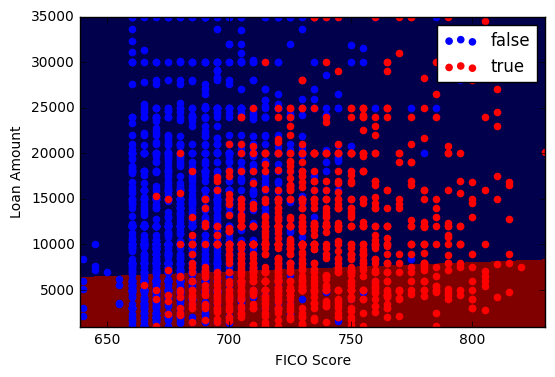

In [23]:
prettyPicture(logreg, X, y)

<img src="files/images/example.png" />

### Exercise
Try the following pairs of (fico, amt) values and plug them into the pz() function mimicing the syntax below.  What insight does this give you?


* 820,50000
* 820,60000
* 820,70000
* 820,63000
* 820,65000

Place your cursor on the cell below.  Hit shift-enter to recreate the result.  
Then click Insert->Cell Below via the Insert menu dropdown.  This creates a new empty cell.
Now enter the pz() function with the next pair of values. Hit shift-enter.
Repeat this till the end of the list of values.
Answer the question above, if possible.
Then explore other pairs as you wish.

In [ ]:
pz(820,50000,coeff)

### Challenge Exercise

Use the supporting notebooks in the appendix to learn some plotting techniques and try to create a yes/no plot for loan amount on x-axis and probability of loan on the y-axis for a FICO score of 720.  Do the same for a fico score of 820.

### Extra Challenge Exercise

How would you create a plot that showed the probability of getting a loan as a function of _both_ FICO score and loan amount varying?  What tools would you need?


---

### Conclusion

We see for the (720, 10000) case, a probability close to 0.7 which tells us that we have a good chance of getting the loan at a favorable interest rate.
Using our threshold of 0.67 we count this as a 'yes'.

Using a Logistic Regression model, a desired Interest Rate of 12 per cent, we use dthe Lending Club dataset to compute a probability that we will get a 10,000 dollar loan with a FICO Score of 720.  Our result indicated with a strong degree of certainty that we would be able to procure a loan with these terms. 

When we try the multiple combinations we see the following: 

* With a FICO Score of 720 the chance of a 20,000 and 30,000 Loan is lower than 0.67 so we count that as a probable "no".
* For the same amounts the FICO=820 score corresponds to probabilities greater than 0.75 and we count that as a "yes".
* For the same FICO the probability goes down with increasing Loan Amount 
* For the same Loan Amount, the lower FICO has a lower probability.  
* This is consistent with the signs of the coefficients for these variables in our model.   

---


In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()